###Python for data 
This is a jupyter test file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams
# rcParams['axes.edgecolor']='white'
rcParams['xtick.color']='white'
rcParams['ytick.color']='white'
rcParams['axes.labelcolor']='white'
rcParams['text.color']='red'
# rcParams['figure.facecolor']=(1, 1, 1, 0)
# rcParams['figure.edgecolor']=(1, 1, 1, 0)


# list=[(param, value) for param, value in plt.rcParams.items() if 'color' in param]
# list

In [7]:
# names1880=pd.read_csv('data/ch02/names/yob1880.txt',names=['name','sex','births'])
# count_by_sex=names1880.groupby('sex').births.sum()

In [8]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
    relative_path='F:/pyc/PyCharm/GitHub/reptiles_gh/Machine Learning/python for DA/DATA/ch02/names/yob%d.txt'  % year
    frame=pd.read_csv(relative_path,names=columns)
    frame['year']=year
    pieces.append(frame)

names=pd.concat(pieces,ignore_index=True)

In [9]:
def plt_year_sex():
    year_sex=names.pivot_table(values='births',columns=['sex'],index=['year'],aggfunc=np.sum)
    year_sex.plot(title='Year-Sex')
    plt.show()

In [10]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()  #births.sum()是对按year,sex分组后的小组内求和
    return group

In [17]:
names=names.groupby(['year','sex']).apply(add_prop) #得到1880年name1 Female人数占 1880年 Female总人数的比例
check=np.allclose(names.groupby(['year','sex']).prop.sum(),1)
check

True

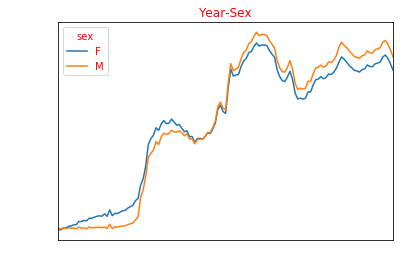

In [15]:
plt_year_sex()

In [18]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
# top1000

###分析命名趋势

In [19]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

total_births=pd.pivot_table(top1000,values='births',index='year',columns='name',aggfunc=sum)
subset=total_births[['John','Harry','Mary','Marilyn']]

subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')
plt.show()

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\reshape\pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
